## Preparing the necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Preparing the dataset

In [2]:
cl = datasets.fetch_california_housing()

In [3]:
cl.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(cl.target_names)

['MedHouseVal']


In [5]:
df=pd.DataFrame(data=cl.data,columns=cl.feature_names)
df['price']=cl.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(cl.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Question:

## Q1: Describe briefly about the basic statistic values from the dataset. You can use built-in function from Pandas to make the task easier

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As shown above California housing has average of media income in the mount of 3.870671, house age 29 years with price amount $ 206,855.8

## Q2: What is the distribution of house value in California - Describe it through Visualization

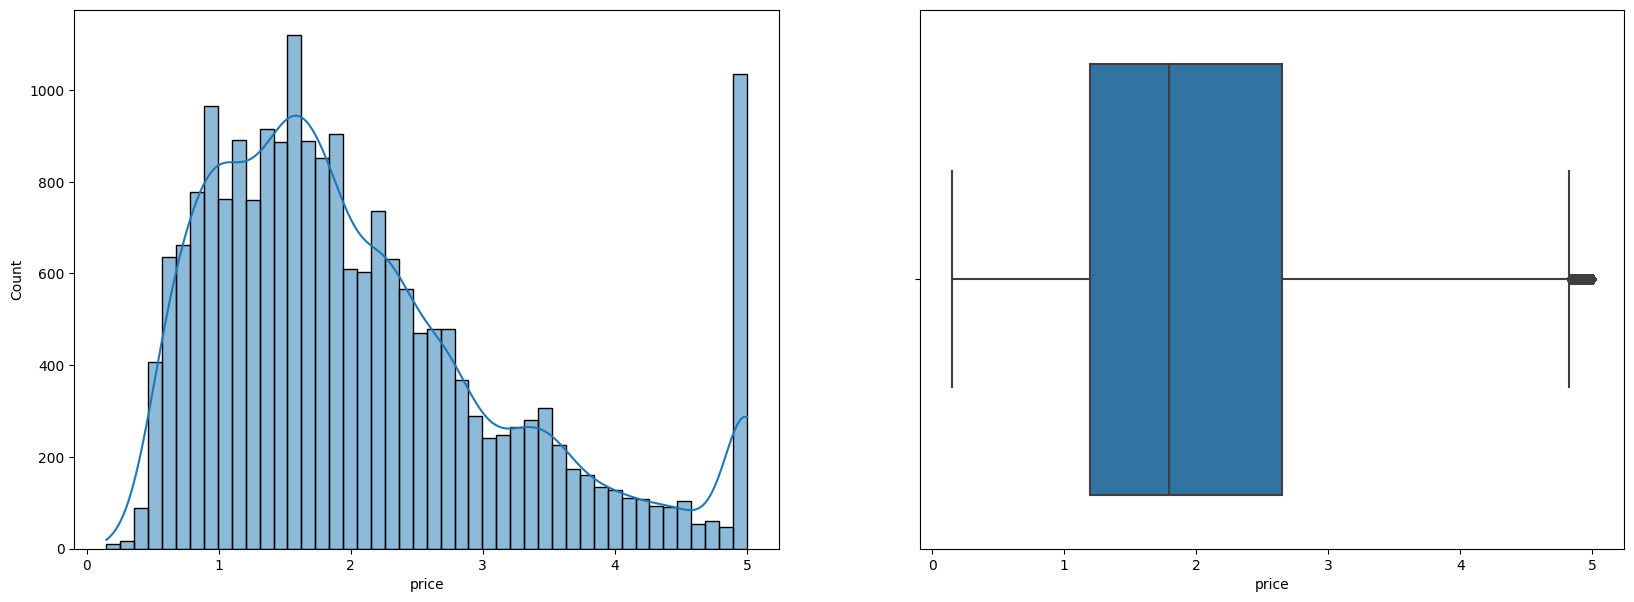

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.histplot(data=df,x='price',kde=True,ax=ax[0])
sns.boxplot(data=df,x='price',ax=ax[1])
plt.show()

## Q3: Feature Relation: State your basic intuition for the relationship between MedInc & AveRooms with median house value. Prove your intuition through Visualization.

<Axes: >

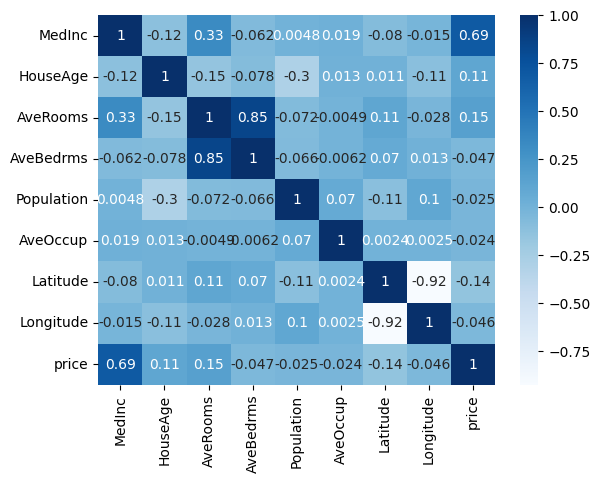

In [39]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")


Based on those visualization, MedInc has positive relation with Median value house. This is idicate the people with high Income they have a high price for the house value. But AveRooms has small positive relation with Median value house, this indicate not every high value house has a many room inside nor the low value house has less room inside, it's depend on the individual needs.

## Q4: Feature Description: Show the highest and the lowest price of the house. Describe the charactersitics for both of this house!

In [54]:
#Show the highest price the house
df1 = df[df['price']==df['price'].max()]
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [58]:
df1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,9.650000e+02
mean,7.825123,33.802073,6.817436,1.097833,1112.808290,2.570442,35.225751,-119.702477,5.000010e+00
std,3.245021,13.027787,4.666195,0.801147,813.321776,1.492767,1.783949,1.946521,8.886390e-16
min,0.499900,2.000000,1.824719,0.500000,13.000000,1.275000,32.680000,-122.640000,5.000010e+00
25%,5.239100,24.000000,5.505593,1.009554,636.000000,2.079710,33.970000,-122.120000,5.000010e+00
50%,7.719700,34.000000,6.884058,1.052227,927.000000,2.518789,34.130000,-118.480000,5.000010e+00
75%,10.112200,44.000000,7.893733,1.102450,1347.000000,2.840580,37.400000,-118.330000,5.000010e+00
max,15.000100,52.000000,141.909091,25.636364,7431.000000,41.214286,38.910000,-116.430000,5.000010e+00


array([[<Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>, <Axes: >]], dtype=object)

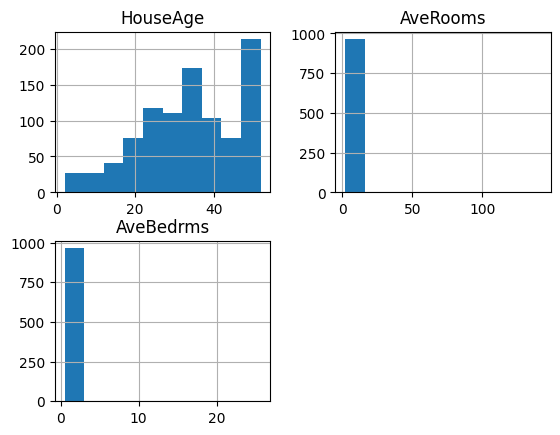

In [60]:
df1[['HouseAge','AveRooms','AveBedrms']].hist()

In [46]:
#Show the lowest Price the house
df2 = df[df['price']==df['price'].min()]
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
2521,1.6607,16.0,6.710526,1.921053,85.0,2.236842,39.71,-122.74,0.14999
2799,2.1000,19.0,3.774390,1.457317,490.0,2.987805,36.40,-117.02,0.14999
9188,4.1932,52.0,3.568889,1.186667,628.0,2.791111,34.24,-117.86,0.14999
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17,0.14999


In [47]:
df2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
mean,2.122475,30.750000,6.575951,2.016259,305.250000,2.566440,37.665000,-120.197500,0.14999
std,1.529547,16.680827,4.045743,1.034600,299.623514,0.381573,2.858257,3.207308,0.00000
min,0.536000,16.000000,3.568889,1.186667,18.000000,2.236842,34.240000,-123.170000,0.14999
25%,1.379525,18.250000,3.723015,1.389654,68.250000,2.246711,35.860000,-122.847500,0.14999
50%,1.880350,27.500000,5.242458,1.689185,287.500000,2.520556,38.055000,-120.300000,0.14999
75%,2.623300,40.000000,8.095395,2.315789,524.500000,2.840285,39.860000,-117.650000,0.14999
max,4.193200,52.000000,12.250000,3.500000,628.000000,2.987805,40.310000,-117.020000,0.14999


array([[<Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>, <Axes: >]], dtype=object)

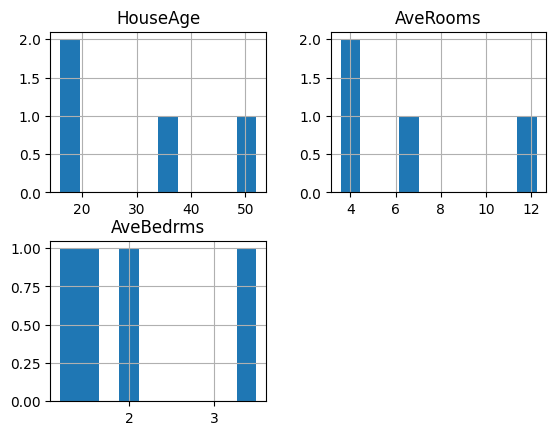

In [61]:
df2[['HouseAge','AveRooms','AveBedrms']].hist()

Based on statistics as shown above, the highest price of the house frequently has 6-8 room with one bedroom in their house. While the lowest price has usually has 3 rooms with 1-2 bedroom.

## Q5: SQL-Query Ability

Suppose you are a data analyst for a retail bank and you want to analyze the bonuses given to employees last month. The following table is given to you:

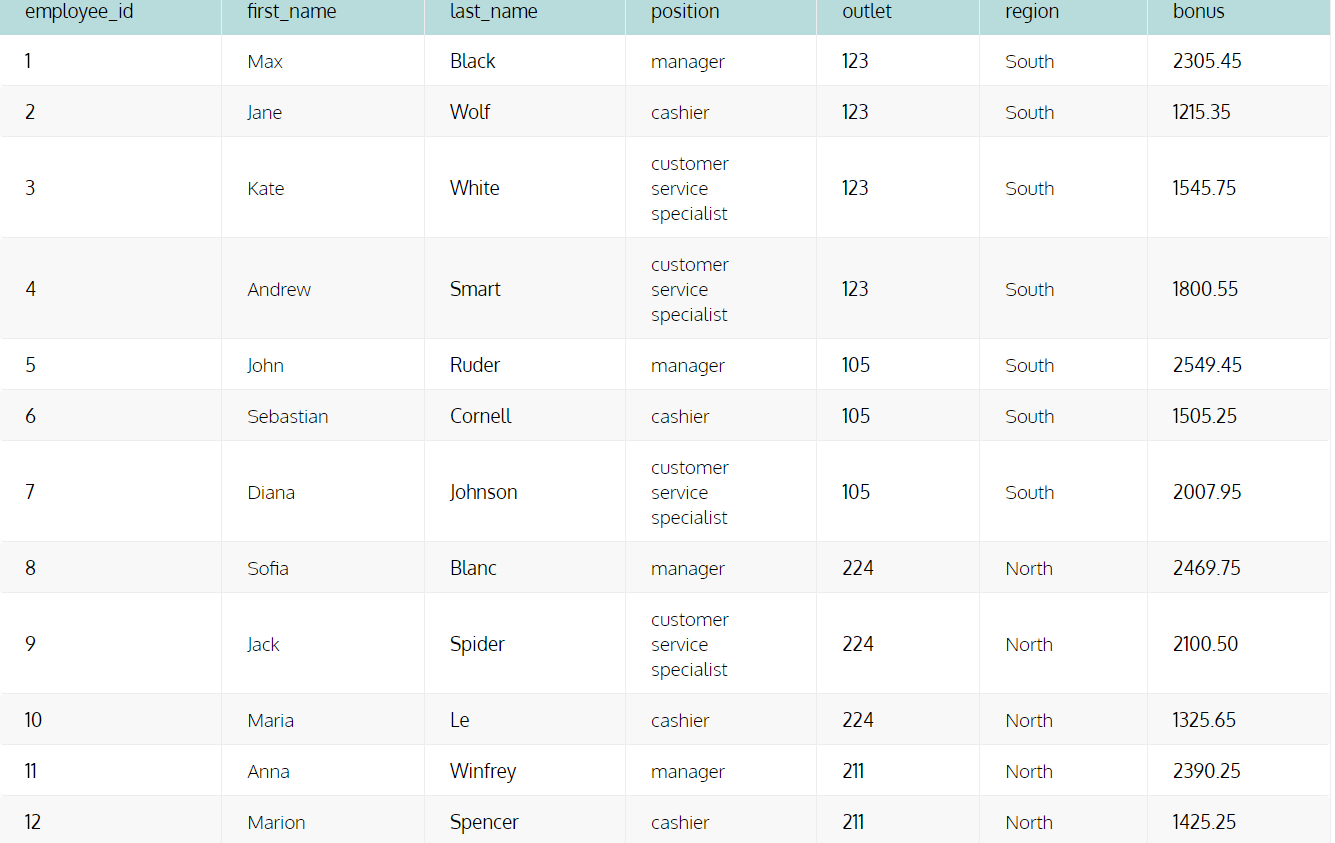

Write a query to show the bonus paid to each employee along with the average bonus for their position. To do this, you first need to calculate the average bonus for every position. Try to **make an optimized query.**